## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 0.01

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.036765


0:	learn: 0.9793830	total: 47.7ms	remaining: 47.6s
1:	learn: 0.9582303	total: 48.6ms	remaining: 24.3s
2:	learn: 0.9353695	total: 49.6ms	remaining: 16.5s
3:	learn: 0.9161608	total: 50.5ms	remaining: 12.6s
4:	learn: 0.8990488	total: 51.4ms	remaining: 10.2s
5:	learn: 0.8832373	total: 52.1ms	remaining: 8.64s
6:	learn: 0.8650817	total: 52.9ms	remaining: 7.51s
7:	learn: 0.8477194	total: 53.7ms	remaining: 6.66s
8:	learn: 0.8311338	total: 54.5ms	remaining: 6s
9:	learn: 0.8132347	total: 55.4ms	remaining: 5.48s
10:	learn: 0.7953546	total: 56.3ms	remaining: 5.06s
11:	learn: 0.7796915	total: 57.1ms	remaining: 4.7s
12:	learn: 0.7641617	total: 57.9ms	remaining: 4.4s
13:	learn: 0.7484061	total: 58.8ms	remaining: 4.14s
14:	learn: 0.7353909	total: 59.6ms	remaining: 3.91s
15:	learn: 0.7199546	total: 60.4ms	remaining: 3.71s
16:	learn: 0.7058790	total: 61.3ms	remaining: 3.54s
17:	learn: 0.6928959	total: 62.2ms	remaining: 3.39s
18:	learn: 0.6802797	total: 63.1ms	remaining: 3.26s
19:	learn: 0.6666222	total:

115:	learn: 0.2785930	total: 148ms	remaining: 1.13s
116:	learn: 0.2773867	total: 149ms	remaining: 1.13s
117:	learn: 0.2762157	total: 150ms	remaining: 1.12s
118:	learn: 0.2751476	total: 151ms	remaining: 1.12s
119:	learn: 0.2742685	total: 152ms	remaining: 1.11s
120:	learn: 0.2732505	total: 153ms	remaining: 1.11s
121:	learn: 0.2722779	total: 154ms	remaining: 1.11s
122:	learn: 0.2706818	total: 155ms	remaining: 1.1s
123:	learn: 0.2699505	total: 156ms	remaining: 1.1s
124:	learn: 0.2691699	total: 157ms	remaining: 1.1s
125:	learn: 0.2678759	total: 157ms	remaining: 1.09s
126:	learn: 0.2667829	total: 158ms	remaining: 1.09s
127:	learn: 0.2658124	total: 159ms	remaining: 1.08s
128:	learn: 0.2648855	total: 160ms	remaining: 1.08s
129:	learn: 0.2641466	total: 161ms	remaining: 1.08s
130:	learn: 0.2633410	total: 162ms	remaining: 1.07s
131:	learn: 0.2621334	total: 163ms	remaining: 1.07s
132:	learn: 0.2614823	total: 164ms	remaining: 1.07s
133:	learn: 0.2601560	total: 165ms	remaining: 1.06s
134:	learn: 0.2

158:	learn: 0.2408174	total: 187ms	remaining: 988ms
159:	learn: 0.2401391	total: 188ms	remaining: 986ms
160:	learn: 0.2396371	total: 189ms	remaining: 983ms
161:	learn: 0.2390494	total: 190ms	remaining: 981ms
162:	learn: 0.2387350	total: 191ms	remaining: 978ms
163:	learn: 0.2379292	total: 191ms	remaining: 975ms
164:	learn: 0.2372001	total: 192ms	remaining: 973ms
165:	learn: 0.2366878	total: 193ms	remaining: 970ms
166:	learn: 0.2363036	total: 194ms	remaining: 968ms
167:	learn: 0.2355500	total: 195ms	remaining: 965ms
168:	learn: 0.2349215	total: 196ms	remaining: 962ms
169:	learn: 0.2341849	total: 197ms	remaining: 960ms
170:	learn: 0.2335247	total: 197ms	remaining: 957ms
171:	learn: 0.2330065	total: 198ms	remaining: 955ms
172:	learn: 0.2326195	total: 199ms	remaining: 952ms
173:	learn: 0.2319223	total: 200ms	remaining: 949ms
174:	learn: 0.2313989	total: 201ms	remaining: 947ms
175:	learn: 0.2306230	total: 202ms	remaining: 945ms
176:	learn: 0.2299509	total: 203ms	remaining: 942ms
177:	learn: 

273:	learn: 0.1824564	total: 289ms	remaining: 766ms
274:	learn: 0.1820491	total: 290ms	remaining: 764ms
275:	learn: 0.1816464	total: 291ms	remaining: 763ms
276:	learn: 0.1813464	total: 292ms	remaining: 762ms
277:	learn: 0.1810632	total: 293ms	remaining: 760ms
278:	learn: 0.1808467	total: 294ms	remaining: 759ms
279:	learn: 0.1804819	total: 295ms	remaining: 758ms
280:	learn: 0.1800651	total: 295ms	remaining: 756ms
281:	learn: 0.1796570	total: 296ms	remaining: 755ms
282:	learn: 0.1792465	total: 297ms	remaining: 753ms
283:	learn: 0.1789390	total: 298ms	remaining: 752ms
284:	learn: 0.1785633	total: 299ms	remaining: 750ms
285:	learn: 0.1781925	total: 300ms	remaining: 749ms
286:	learn: 0.1777819	total: 301ms	remaining: 747ms
287:	learn: 0.1773282	total: 302ms	remaining: 746ms
288:	learn: 0.1769502	total: 303ms	remaining: 744ms
289:	learn: 0.1766256	total: 304ms	remaining: 743ms
290:	learn: 0.1762818	total: 305ms	remaining: 742ms
291:	learn: 0.1759812	total: 306ms	remaining: 741ms
292:	learn: 

316:	learn: 0.1675146	total: 327ms	remaining: 704ms
317:	learn: 0.1672116	total: 328ms	remaining: 703ms
318:	learn: 0.1668852	total: 329ms	remaining: 702ms
319:	learn: 0.1666117	total: 329ms	remaining: 700ms
320:	learn: 0.1661494	total: 330ms	remaining: 699ms
321:	learn: 0.1658633	total: 331ms	remaining: 697ms
322:	learn: 0.1655860	total: 332ms	remaining: 696ms
323:	learn: 0.1651200	total: 333ms	remaining: 694ms
324:	learn: 0.1647142	total: 334ms	remaining: 693ms
325:	learn: 0.1645623	total: 335ms	remaining: 692ms
326:	learn: 0.1642024	total: 335ms	remaining: 690ms
327:	learn: 0.1638373	total: 336ms	remaining: 689ms
328:	learn: 0.1635890	total: 337ms	remaining: 687ms
329:	learn: 0.1632923	total: 338ms	remaining: 686ms
330:	learn: 0.1629712	total: 339ms	remaining: 685ms
331:	learn: 0.1624494	total: 340ms	remaining: 683ms
332:	learn: 0.1620981	total: 340ms	remaining: 682ms
333:	learn: 0.1618328	total: 341ms	remaining: 681ms
334:	learn: 0.1614792	total: 342ms	remaining: 679ms
335:	learn: 

430:	learn: 0.1378797	total: 427ms	remaining: 564ms
431:	learn: 0.1376125	total: 428ms	remaining: 563ms
432:	learn: 0.1373761	total: 429ms	remaining: 562ms
433:	learn: 0.1370286	total: 430ms	remaining: 561ms
434:	learn: 0.1368676	total: 431ms	remaining: 560ms
435:	learn: 0.1367230	total: 432ms	remaining: 558ms
436:	learn: 0.1364168	total: 433ms	remaining: 557ms
437:	learn: 0.1362182	total: 433ms	remaining: 556ms
438:	learn: 0.1360213	total: 434ms	remaining: 555ms
439:	learn: 0.1359071	total: 435ms	remaining: 554ms
440:	learn: 0.1356568	total: 436ms	remaining: 553ms
441:	learn: 0.1353241	total: 437ms	remaining: 551ms
442:	learn: 0.1351545	total: 438ms	remaining: 550ms
443:	learn: 0.1349249	total: 438ms	remaining: 549ms
444:	learn: 0.1346373	total: 439ms	remaining: 548ms
445:	learn: 0.1343300	total: 440ms	remaining: 547ms
446:	learn: 0.1339775	total: 441ms	remaining: 546ms
447:	learn: 0.1336963	total: 442ms	remaining: 545ms
448:	learn: 0.1334275	total: 443ms	remaining: 543ms
449:	learn: 

473:	learn: 0.1282037	total: 463ms	remaining: 514ms
474:	learn: 0.1280313	total: 464ms	remaining: 513ms
475:	learn: 0.1278409	total: 465ms	remaining: 512ms
476:	learn: 0.1275997	total: 466ms	remaining: 510ms
477:	learn: 0.1272860	total: 466ms	remaining: 509ms
478:	learn: 0.1269838	total: 467ms	remaining: 508ms
479:	learn: 0.1268787	total: 468ms	remaining: 507ms
480:	learn: 0.1267064	total: 469ms	remaining: 506ms
481:	learn: 0.1264370	total: 470ms	remaining: 505ms
482:	learn: 0.1262196	total: 471ms	remaining: 504ms
483:	learn: 0.1259611	total: 472ms	remaining: 503ms
484:	learn: 0.1257490	total: 472ms	remaining: 502ms
485:	learn: 0.1255953	total: 473ms	remaining: 500ms
486:	learn: 0.1254128	total: 474ms	remaining: 499ms
487:	learn: 0.1253223	total: 475ms	remaining: 498ms
488:	learn: 0.1251908	total: 476ms	remaining: 497ms
489:	learn: 0.1251006	total: 477ms	remaining: 496ms
490:	learn: 0.1250088	total: 477ms	remaining: 495ms
491:	learn: 0.1247732	total: 478ms	remaining: 494ms
492:	learn: 

596:	learn: 0.1071407	total: 565ms	remaining: 381ms
597:	learn: 0.1070094	total: 566ms	remaining: 380ms
598:	learn: 0.1068378	total: 567ms	remaining: 379ms
599:	learn: 0.1067240	total: 568ms	remaining: 378ms
600:	learn: 0.1066308	total: 568ms	remaining: 377ms
601:	learn: 0.1064834	total: 569ms	remaining: 376ms
602:	learn: 0.1063183	total: 570ms	remaining: 375ms
603:	learn: 0.1061908	total: 571ms	remaining: 374ms
604:	learn: 0.1060025	total: 572ms	remaining: 373ms
605:	learn: 0.1058657	total: 572ms	remaining: 372ms
606:	learn: 0.1057348	total: 573ms	remaining: 371ms
607:	learn: 0.1056360	total: 574ms	remaining: 370ms
608:	learn: 0.1054397	total: 575ms	remaining: 369ms
609:	learn: 0.1052296	total: 576ms	remaining: 368ms
610:	learn: 0.1050978	total: 577ms	remaining: 367ms
611:	learn: 0.1049759	total: 577ms	remaining: 366ms
612:	learn: 0.1047950	total: 578ms	remaining: 365ms
613:	learn: 0.1046790	total: 579ms	remaining: 364ms
614:	learn: 0.1045934	total: 580ms	remaining: 363ms
615:	learn: 

634:	learn: 0.1012757	total: 602ms	remaining: 346ms
635:	learn: 0.1010945	total: 603ms	remaining: 345ms
636:	learn: 0.1010060	total: 604ms	remaining: 344ms
637:	learn: 0.1008662	total: 604ms	remaining: 343ms
638:	learn: 0.1007188	total: 605ms	remaining: 342ms
639:	learn: 0.1005967	total: 606ms	remaining: 341ms
640:	learn: 0.1003681	total: 607ms	remaining: 340ms
641:	learn: 0.1001886	total: 608ms	remaining: 339ms
642:	learn: 0.1001231	total: 609ms	remaining: 338ms
643:	learn: 0.0999201	total: 609ms	remaining: 337ms
644:	learn: 0.0997243	total: 610ms	remaining: 336ms
645:	learn: 0.0996245	total: 611ms	remaining: 335ms
646:	learn: 0.0995261	total: 612ms	remaining: 334ms
647:	learn: 0.0993747	total: 613ms	remaining: 333ms
648:	learn: 0.0992698	total: 614ms	remaining: 332ms
649:	learn: 0.0991658	total: 615ms	remaining: 331ms
650:	learn: 0.0990463	total: 615ms	remaining: 330ms
651:	learn: 0.0989367	total: 616ms	remaining: 329ms
652:	learn: 0.0988354	total: 617ms	remaining: 328ms
653:	learn: 

754:	learn: 0.0854359	total: 702ms	remaining: 228ms
755:	learn: 0.0853455	total: 703ms	remaining: 227ms
756:	learn: 0.0852547	total: 704ms	remaining: 226ms
757:	learn: 0.0851671	total: 705ms	remaining: 225ms
758:	learn: 0.0850702	total: 705ms	remaining: 224ms
759:	learn: 0.0849800	total: 706ms	remaining: 223ms
760:	learn: 0.0848933	total: 707ms	remaining: 222ms
761:	learn: 0.0846586	total: 708ms	remaining: 221ms
762:	learn: 0.0845349	total: 709ms	remaining: 220ms
763:	learn: 0.0844346	total: 710ms	remaining: 219ms
764:	learn: 0.0843622	total: 710ms	remaining: 218ms
765:	learn: 0.0842870	total: 711ms	remaining: 217ms
766:	learn: 0.0841950	total: 712ms	remaining: 216ms
767:	learn: 0.0841282	total: 713ms	remaining: 215ms
768:	learn: 0.0840619	total: 714ms	remaining: 214ms
769:	learn: 0.0839081	total: 715ms	remaining: 213ms
770:	learn: 0.0837202	total: 715ms	remaining: 212ms
771:	learn: 0.0835524	total: 716ms	remaining: 212ms
772:	learn: 0.0834207	total: 717ms	remaining: 211ms
773:	learn: 

795:	learn: 0.0812950	total: 737ms	remaining: 189ms
796:	learn: 0.0812315	total: 738ms	remaining: 188ms
797:	learn: 0.0810291	total: 739ms	remaining: 187ms
798:	learn: 0.0809826	total: 739ms	remaining: 186ms
799:	learn: 0.0808953	total: 740ms	remaining: 185ms
800:	learn: 0.0808623	total: 741ms	remaining: 184ms
801:	learn: 0.0808489	total: 742ms	remaining: 183ms
802:	learn: 0.0807639	total: 743ms	remaining: 182ms
803:	learn: 0.0806450	total: 744ms	remaining: 181ms
804:	learn: 0.0805655	total: 744ms	remaining: 180ms
805:	learn: 0.0804313	total: 745ms	remaining: 179ms
806:	learn: 0.0802978	total: 746ms	remaining: 178ms
807:	learn: 0.0802387	total: 747ms	remaining: 177ms
808:	learn: 0.0801072	total: 748ms	remaining: 177ms
809:	learn: 0.0799547	total: 749ms	remaining: 176ms
810:	learn: 0.0798502	total: 749ms	remaining: 175ms
811:	learn: 0.0798206	total: 750ms	remaining: 174ms
812:	learn: 0.0797762	total: 751ms	remaining: 173ms
813:	learn: 0.0795790	total: 752ms	remaining: 172ms
814:	learn: 

913:	learn: 0.0703179	total: 837ms	remaining: 78.8ms
914:	learn: 0.0702500	total: 838ms	remaining: 77.9ms
915:	learn: 0.0702212	total: 839ms	remaining: 77ms
916:	learn: 0.0700883	total: 840ms	remaining: 76.1ms
917:	learn: 0.0699883	total: 841ms	remaining: 75.1ms
918:	learn: 0.0699332	total: 842ms	remaining: 74.2ms
919:	learn: 0.0698475	total: 843ms	remaining: 73.3ms
920:	learn: 0.0697426	total: 843ms	remaining: 72.4ms
921:	learn: 0.0696181	total: 844ms	remaining: 71.4ms
922:	learn: 0.0694964	total: 845ms	remaining: 70.5ms
923:	learn: 0.0694349	total: 846ms	remaining: 69.6ms
924:	learn: 0.0693576	total: 847ms	remaining: 68.7ms
925:	learn: 0.0692736	total: 848ms	remaining: 67.7ms
926:	learn: 0.0692230	total: 848ms	remaining: 66.8ms
927:	learn: 0.0690717	total: 849ms	remaining: 65.9ms
928:	learn: 0.0689558	total: 850ms	remaining: 65ms
929:	learn: 0.0688445	total: 851ms	remaining: 64.1ms
930:	learn: 0.0687669	total: 852ms	remaining: 63.1ms
931:	learn: 0.0686594	total: 853ms	remaining: 62.2

956:	learn: 0.0663957	total: 874ms	remaining: 39.3ms
957:	learn: 0.0662733	total: 875ms	remaining: 38.3ms
958:	learn: 0.0661413	total: 876ms	remaining: 37.4ms
959:	learn: 0.0660855	total: 877ms	remaining: 36.5ms
960:	learn: 0.0659838	total: 877ms	remaining: 35.6ms
961:	learn: 0.0659437	total: 878ms	remaining: 34.7ms
962:	learn: 0.0658268	total: 879ms	remaining: 33.8ms
963:	learn: 0.0657279	total: 880ms	remaining: 32.9ms
964:	learn: 0.0656477	total: 881ms	remaining: 31.9ms
965:	learn: 0.0655809	total: 881ms	remaining: 31ms
966:	learn: 0.0655116	total: 882ms	remaining: 30.1ms
967:	learn: 0.0654445	total: 883ms	remaining: 29.2ms
968:	learn: 0.0653442	total: 884ms	remaining: 28.3ms
969:	learn: 0.0652869	total: 885ms	remaining: 27.4ms
970:	learn: 0.0652557	total: 886ms	remaining: 26.4ms
971:	learn: 0.0652081	total: 886ms	remaining: 25.5ms
972:	learn: 0.0651396	total: 887ms	remaining: 24.6ms
973:	learn: 0.0651023	total: 888ms	remaining: 23.7ms
974:	learn: 0.0650096	total: 889ms	remaining: 22

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

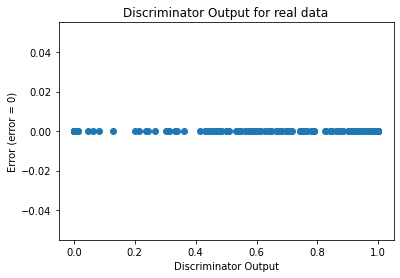

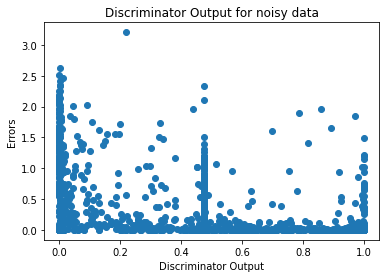

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)

# ABC - GAN Model with skip connection

In [14]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [15]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [16]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

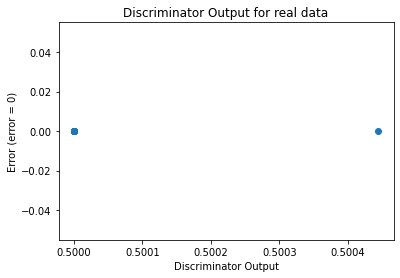

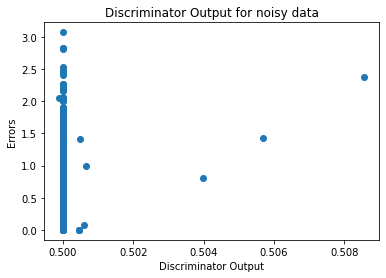

In [17]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [18]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0009]], device='cuda:0', requires_grad=True)
